<a href="https://colab.research.google.com/github/LucilleKaleha/Week_3_Independent_Project/blob/master/W3_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Question

## 1.1.1 Defining the Question

We have been tasked to understande the electric car usage by investigating a claim that in any two given stations, the average number of bluecars taken is never the same. 

## 1.1.2 Metric of Success

We will measure the success of our analysis by being able compare the number of bluecars in the different stations. 

To do this we will use simple random sampling to get two postal code areas that we will focus our analysis 

## 1.1.3 Context

Our context will be based on our project question as follows:

Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest.

## 1.1.4 Experimental Design

Exploratory Data Analysis

Univariate Analysis

Bivariate Analysis

Hypothesis Testing

## 1.1.5 Appropriateness of Data

The dataset and glossary to use for this project can be found here [http://bit.ly/DSCoreAutolibDataset] and here [Link] respectively.

The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).

# 1.2 Libraries

In [0]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline
from scipy import stats
from statsmodels.stats import weightstats as stests

# 1.3 Exploratory Data Analysis

## 1.3.1 Creating a Dataframe from the Dataset

In [2]:
# Loading the dataset and Previewing the top 
# 
Autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
Autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [3]:
# Preview of the bottom o the dataset
Autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


## 1.3.2 Overview of the Data

In [4]:
# Using Pandas profiling to get an overview description of the dataframe

pp.ProfileReport(Autolib)

Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,6


In [0]:
# From the overview we can see that we don't have any missing data
# 
# Let's take a closer at the dataframe below

In [5]:
# Getting information of the different columns in the dataframe
# 
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [6]:
# Previewing the summary statistics
# 
Autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [7]:
# getting the shape of the dataframe
# 
Autolib.shape
# 
# the dataset has 16,085 rows and 13 columns

(16085, 13)

In [8]:
# checkin the size of the dataset
# 
Autolib.size
# 
# the dataset has 209105 items

209105

In [9]:
# Let's look at the data types
# 
Autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# 1.4 Data Cleaning

In [11]:
# Checking the column names
Autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [12]:
# Cleaning the column names
# The code below will change all the column names to lower case and replace the spaces 
# 
Autolib.columns = Autolib.columns.str.lower().str.replace(' ', '_')
Autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [13]:
# Checking whether the dataset has any duplicated data
len(Autolib[Autolib.duplicated()])

0

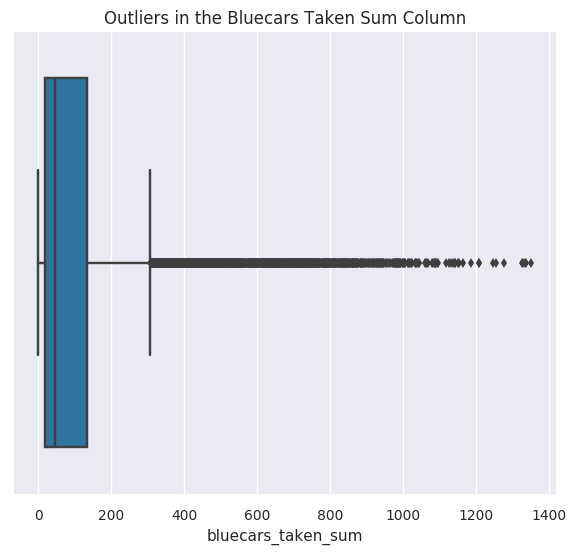

In [14]:
# Checking for outliers
# 
plt.figure(dpi = 100, figsize = (7, 6))
sns.set_style('darkgrid')
sns.boxplot(Autolib['bluecars_taken_sum'])
plt.title('Outliers in the Bluecars Taken Sum Column')
plt.show()


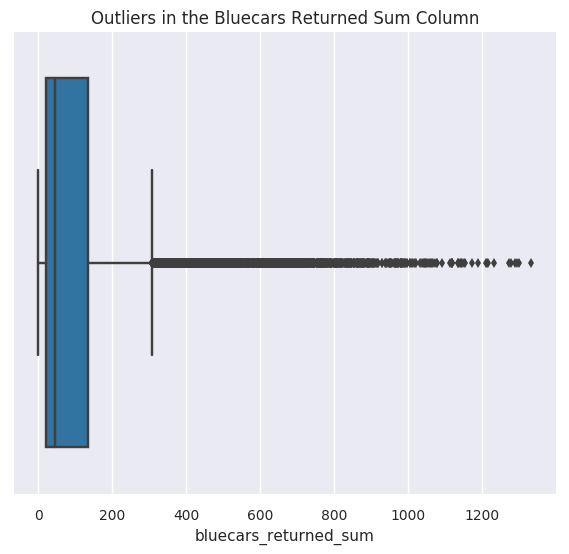

In [15]:
# Checcking for outliers
# 
plt.figure(dpi = 100, figsize = (7, 6))
sns.set_style('darkgrid')
sns.boxplot(Autolib['bluecars_returned_sum'])
plt.title('Outliers in the Bluecars Returned Sum Column')
plt.show()

In [0]:
# Dropping irrelevant data
# We only need data on the bluecars for our analysis
# we can therefore drop data on the utilib and utilib14 by creating a new dataframe without them
# We are also going to drop any other data that isirrelevant to our analysis
# 
Autolib.drop(['utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'n_daily_data_points'], axis = 1, inplace = True)

In [17]:
# Previewing our dataframe
# 
Autolib.head()

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,0,weekday,110,103,22,20
1,75001,1/2/2018,1,weekday,98,94,23,22
2,75001,1/3/2018,2,weekday,138,139,27,27
3,75001,1/4/2018,3,weekday,104,104,25,21
4,75001,1/5/2018,4,weekday,114,117,18,20


In [19]:
# From the overview we conducted using Pandas profiling, we could see that
# BlueCars_returned_sum is highly correlated with BlueCars_taken_sum 
# Slots_freed_sum is highly correlated with BlueCars_returned_sum 
# Slots_taken_sum is highly correlated with Slots_freed_sum 
# We will therefore not consider these columns for our analysis
# 
Autolib.drop(['bluecars_returned_sum', 'slots_freed_sum',	'slots_taken_sum'], axis = 1, inplace = True)   #Dropping the columns
Autolib.head()   #Previewing the dataframe

,postal_code,date,dayofweek,day_type,bluecars_taken_sum
0,75001,1/1/2018,0,weekday,110
1,75001,1/2/2018,1,weekday,98
2,75001,1/3/2018,2,weekday,138
3,75001,1/4/2018,3,weekday,104
4,75001,1/5/2018,4,weekday,114


# 1.5 Sampling

In [25]:
# Using simple random sampling, we choose two postal code areas to base our analysis
# 
autolib = Autolib.sample(n = 2, replace="False")
autolib

,postal_code,date,dayofweek,day_type,bluecars_taken_sum
9911,92800,4/14/2018,5,weekend,96
155,75001,6/19/2018,1,weekday,6


In [26]:
# Creating a dataframe with the two postal codes identified from our simple random sample
# 
auto = Autolib[(Autolib.postal_code  == 92800)| (Autolib.postal_code  == 75001)]
auto.postal_code.unique()

array([75001, 92800])

# 1.6 Univariate Analysis

## 1.6.1 Measures of Central Tendency

In [33]:
# Conducting univariate analysis for the bluecars taken sum column
# 
max1 = auto.bluecars_taken_sum.max()                                  # Getting the maximum value in the column
min1 = auto.bluecars_taken_sum.min()                                  # Getting the minimum value in the column
Range1 = max1 - min1
# 
print('The mean is' + ' ' + str(auto.bluecars_taken_sum.mean()))       # Calculating the mean
print('\n')
print('The median is' + ' ' + str(auto.bluecars_taken_sum.median()))   # Calculating the median
print('\n')
print('The mode is' + ' ' + str(auto.bluecars_taken_sum.mode()))       # Calculating the mode
print('\n')
print('The range is' + ' ' + str(Range1))                                                            # Calculating the range
print('\n')
print('The standard deviation is' + ' ' + str(auto.bluecars_taken_sum.std()))    # Calculating the standard deviation
print('\n')
print('The variance is' + ' ' + str(auto.bluecars_taken_sum.var()))     # Calculating the variance
print('\n')
print('The skewness is' + ' ' + str(auto.bluecars_taken_sum.skew()))    # Calculating the skewness
print('\n')
print('The kurtosis is' + ' ' + str(auto.bluecars_taken_sum.kurt()))    # Calculating the kurtosis
print('\n')
print('The Interquartile range is as follows' + ' ' + str(auto.bluecars_taken_sum.quantile([0.25,0.5,0.75])))   # Calculating the Interquantile Range

The mean is 112.65064102564102


The median is 104.0


The mode is 0    98
dtype: int64


The range is 254


The standard deviation is 37.22759236142302


The variance is 1385.8936330282816


The skewness is 0.9106519897442072


The kurtosis is 1.775433704674425


The Interquartile range is as follows 0.25     88.00
0.50    104.00
0.75    126.25
Name: bluecars_taken_sum, dtype: float64


From the above analysis we can infer that our dataframe is;

skewed to the right as evidenced by the positive value 0.91065

leptokurtic(k>0) - there is a profusion of outliers! This was also seen when we plotted for outliers

## 1.6.2 Bar Chart

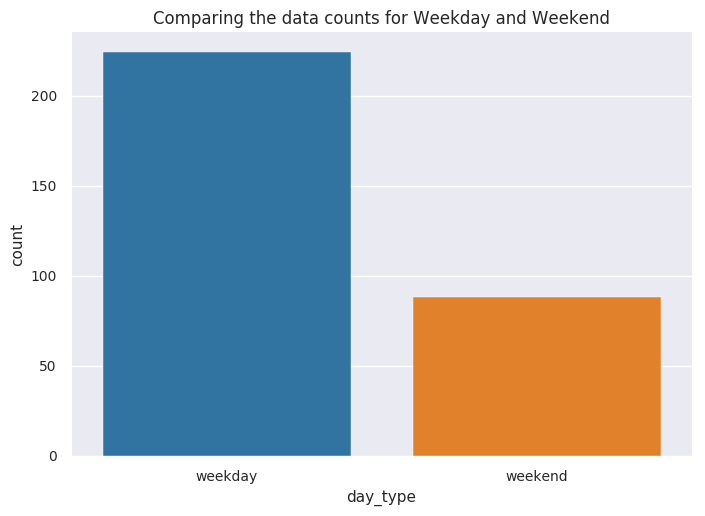

In [34]:
# Plotting a bar chart to compare the value counts for bluecars taken during the weekend and weekday
# 
plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(auto.day_type)
plt.title('Comparing the data counts for Weekday and Weekend')
plt.show()

In [37]:
# In order to have the maximum number of data points for our analysis, we will focus on the number of blucars taken during the weekday
# 
auto1 = auto[auto.day_type == 'weekday']    # Selecting data with 'weekday' only
auto1.day_type.unique()   # Previewing the unique values in the day_type column

array(['weekday'], dtype=object)

## 1.6.3 Frequency Tables

In [51]:
# Creating a frequency table of the postal_code column
# 
pd.crosstab(index = auto1.postal_code, columns = 'count')

col_0,count
postal_code,
75001,112
92800,112


In [53]:
# Creating a frequency table of day of week column and the bluecars taken
# 
auto1.groupby('dayofweek')['bluecars_taken_sum'].sum()

,bluecars_taken_sum
dayofweek,
friday,5018
monday,4363
thursday,4623
tuesday,4490
wednesday,4401


## 1.6.4 Histogram

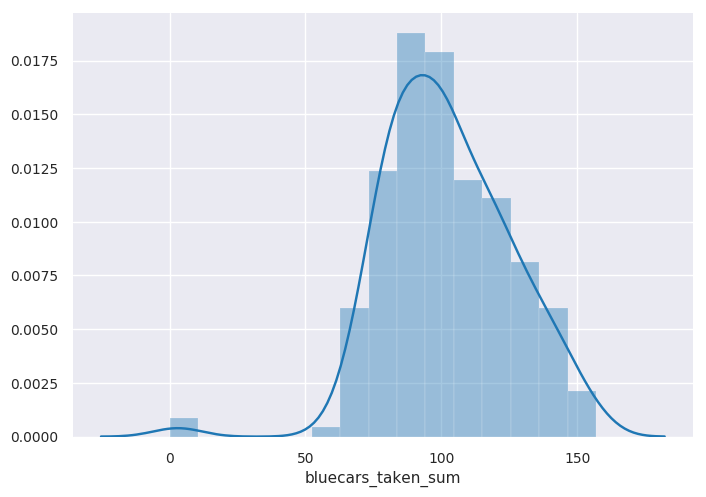

In [47]:
# Now let us plot a histogram for the bluecars taken sum in our dataframe
# 0
sns.distplot(auto1.bluecars_taken_sum, kde = True)

# 1.7 Bivariate Analysis

In [0]:
# Let's map the values in the day of week column
# 
auto1.dayofweek=auto1.dayofweek.map({0:'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4: 'friday'})

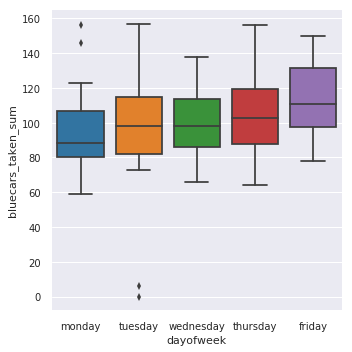

In [77]:
# Plotting a boxplot to compare the number of buecars taken on each daay of the weeek
# 
sns.catplot(x = 'dayofweek', y = 'bluecars_taken_sum', data = auto1, kind = 'box')

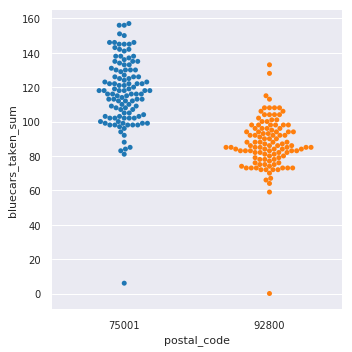

In [74]:
# Scatter plot of distribution of bluecars_ptaken_sum in the two postal codes
# 
sns.catplot(x = 'postal_code', y = 'bluecars_taken_sum', data = auto1, kind = 'swarm')

# 1.8 Multivariate Analysis

Multivariate analysis requires us to find relationships between variables using multiple regression analysis and applying reduction techniques to the dataframe! 

Since regression analysis and reduction are not the goal for our project, we will not be carrying out any Multivariate analysis

# 1.9 Hypothesis Testing

## 1.9.1 Level of Significance

Let's choose a level of significance of 5% (0.05). 

This means that our output should be 95% confident
to give similar kind of result in each sample.
 
If our P value is less than the chosen significance level then we reject the null hypothesis and therefore accept that our sample, auto1 gives reasonable evidence to support the alternative hypothesis

## 1.9.2 The Hypothesis

Our claim, as highlighted in our questsion above, is going to serve as our null hypothesis i.e.

in any two given stations, the average number of bluecars taken is never the same.
 
The alternative hypothesis will therefore be that;

the average number of bluecars is the same in every station

## 1.9.3 Test Statistic

Several different types of tests are used in statistics (i.e. z test, chi square test, t test)

In order to carry out a z test, we have to ensure the following

*   our sample size is greater than 30. Otherwise, we use a t test.
*   the data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect  another data point.
*   our data should be randomly selected from a population, where each item has an equal chance of being selected.
*   sample sizes should be equal if at all possible.





In [72]:
# Carrying out ztest
# 
a = auto1[(auto1.postal_code  == 75001)]       # Create a dataframe with the 75001 postal code only
b = auto1[(auto1.postal_code  == 92800)]       # Create a dataframe with the 92800 postal code only
#        
x = a.bluecars_taken_sum
y = b.bluecars_taken_sum          
# 
ztest ,pval = stests.ztest(x, x2=y, value=0)
print(pval)

5.890169824943019e-36


From our ztest above, p = 5.890169824943019e-36 which is less than our level of significance of 0.05.

We therefore reject the null hypothesis that the average number of bluecars taken is never the same,

and accept the alternative hypothesis